In [142]:
%pylab inline
from sklearn.datasets import load_boston, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam

Populating the interactive namespace from numpy and matplotlib


In [2]:
boston = load_boston()

train_x, test_x, train_y, test_y = train_test_split(boston.data, 
                                                    boston.target.reshape(-1, 1),
                                                    test_size=0.3)

print('train x:', train_x.shape)
print('train y:', train_y.shape)

train x: (354, 13)
train y: (354, 1)


In [3]:
def show_result(y_true, y_pred, sample=30):
    print('R^2:', r2_score(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    
    n = y_pred.shape[0]
    
    
    fig, plots = subplots(2, 2)
    plots = plots.reshape(-1)
    for p  in plots:
        idx = np.random.randint(0, n-sample)
    
        p.plot(y_true[idx: idx+sample])
        p.plot(y_pred[idx: idx+sample], color='red')

# Lasso Regression

R^2: 0.729192812404
MSE: 21.4437283705


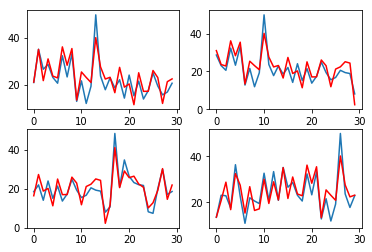

In [4]:
lasso = Lasso(alpha=0.01)
lasso.fit(train_x, train_y)
pred_y = lasso.predict(test_x)

show_result(test_y, pred_y)

# Ridge Regression

R^2: 0.728817214266
MSE: 21.4734699165


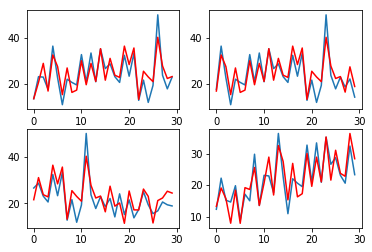

In [5]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_x, train_y)
pred_y = ridge.predict(test_x)

show_result(test_y, pred_y)

# Convolution Neural Network

In [178]:
# Scalers
scaler = MinMaxScaler()
scaler.fit(boston.data)
target_scaler = MinMaxScaler()
target_scaler.fit(boston.target.reshape(-1, 1))

# Scaling
dl_train_x = scaler.transform(train_x).reshape(-1, 13, 1)
dl_train_y = target_scaler.transform(train_y)
dl_test_x = scaler.transform(test_x).reshape(-1, 13, 1)
dl_test_y = target_scaler.transform(test_y)

R^2: 0.900898470579
MSE: 0.00387521176351


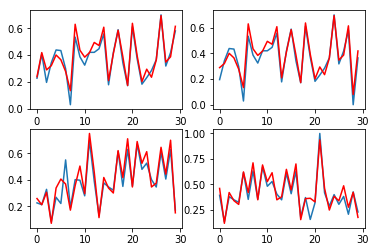

In [186]:
cnn = Sequential()
cnn.add(Conv1D(filters=40, kernel_size=8, strides=1, input_shape=(13, 1), activation='relu'))
cnn.add(Conv1D(filters=45, kernel_size=4, strides=1, activation='relu'))
cnn.add(Conv1D(filters=50, kernel_size=3, strides=1, activation='relu'))
cnn.add(Conv1D(filters=60, kernel_size=1, strides=1, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

cnn.fit(dl_train_x, dl_train_y, verbose=0, epochs=200)
dl_pred_y = cnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, dl_pred_y)

# Deep Neural Network

In [151]:
dl_train_x = dl_train_x.reshape(-1, 13)
dl_test_x = dl_test_x.reshape(-1, 13)

R^2: 0.90789798825
MSE: 0.00360150646979


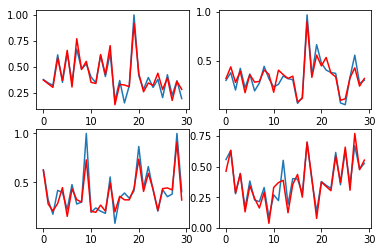

In [176]:
dnn = Sequential()
dnn.add(Dense(178,  batch_input_shape=(None, 13)))
dnn.add(Activation('relu'))

dnn.add(Dense(128))
dnn.add(Activation('relu'))

dnn.add(Dense(64))
dnn.add(Activation('relu'))

dnn.add(Dense(28))
dnn.add(Activation('relu'))

dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

dnn.fit(dl_train_x, dl_train_y, verbose=0, epochs=200)
pred_y = dnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, pred_y)